In [1]:
# Sample API
import flowx
import simulation
import time
from matplotlib import pyplot
from IPython.display import Image
#flowx.__version__

## Project: Part 1

## Introduction

Poisson's equation is a second-order partial differential equation. This is written as:
$$ \Delta^2u = f(x,y)$$
where $\Delta$ is the Laplace operator and is a scalar function.

In fluid dynamics, solving differential equations analytically is very difficult and impossible. Therefore, finite difference method is used to solve such equations.

The purpose of this assignment is to numerically solve Poisson's equation using the following methods:

1. Jacobi iterative method,
2. Gauss-Seidel method,
3. Conjugate Gradient method,
4. Direct Inversion.




# Question 1
Discretize the Poisson equation on a uniform mesh using the following approximation for the second derivatives: 

$$u_{xx}=\frac{u(x_{i+1})-u(x_i)}{x_{i+1}-x-i} $$ 

$$ =\frac{1}{x_{i+1}-x_i}[\frac{u(xc_{i+1})-u(xc_i)}{xc_{i+1}-xc_i}-\frac{u(xc_i)-u(xc_{i-1})}{xc_i-xc_{i-1}}]$$ 

$$=\frac{u(xc_{i+1})-u(xc_i)}{(xc_{i+1}-xc_i)(x_{i+1}-x_i)}-\frac{u(xc_i)-u(xc_i-1)}{(xc_i-xc_{i-1})(x_{i+1}-x_i)}$$

This expression is second-order accurate on a uniform grid. Use an analogous for the y-derivatives. Use the cell-centered grid arrangement. The ghost points can be used to evaluate the boundary condition.

# Answer 1
Poisson equation is solved numerically by discretizing the problem to linear system in order to obtain numerical solutions.
The pupose of discretization is to transform the calculus problem (as continuous equation) to numerical form (as discrete equation).

Finite difference method is used to solve 2D Poisson equation. This converts the entire problem into a system of linear equations that may be readily solved by means of iterative method.

In cartesian coordinate, 2D Poisson equation is written as $$ \frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}=f(x,y)$$

1. Step1: Generate a uniform grid

We denote u a grid function whose value $u_{ij}$ at a typical point $(x_i,y_j)$ in the domain intended to approximate the exact solution $u(x_i,y_j)= u(x,y)$ at that point.

2. Step2: Represent the partial derivative with finite difference formula involving the functional value at the grid point.

$
\left\{\begin{matrix}u(x+\Delta x) & =u(x)+\Delta x{u}'(x)+\frac{(\Delta x)^2}{2!}{u}"(x)+\frac{(\Delta x)^2}{2!}{u}"(x)+\frac{(\Delta x)^3}{3!}{u}^3(x)+O(\Delta x^4)\\u(x-\Delta x) &= u(x)-\Delta x{u}'(x)+\frac{(\Delta x)^2}{2!}{u}"(x)+\frac{(\Delta x)^2}{2!}{u}"(x)-\frac{(\Delta x)^3}{3!}{u}^3(x)+O(\Delta x^4)\end{matrix}\right.
$

By summing u(x+$\Delta x$) and u(x-$\Delta x$), we obtain:$${u}"(x)=\frac{u(x+\Delta x)-2u(x)+u(x-\Delta x)}{\Delta x^2}$$

Then:$$u_{xx}=\frac{u(x_{i+1},y_j)-2u(x_i,y_j)+u(x_{i-1},y_j)}{\Delta x^2}$$
and$$u_{yy}=\frac{u(x_{i},y_{j+1})-2u(x_i,y_j)+u(x_{i},y_{j-1})}{\Delta y^2}$$

The 2D Poisson equation is approximated as:$$\frac{u(x_{i+1},y_j)-2u(x_i,y_j)+u(x_{i-1},y_j)}{\Delta x^2}+\frac{u(x_{i},y_{j+1})-2u(x_i,y_j)+u(x_{i},y_{j-1})}{\Delta y^2}=f(x_i,y_j)$$

Therefore:$$\frac{u(x_{i+1},y_j)+u(x_{i-1},y_j)}{\Delta x^2}+\frac{u(x_{i},y_{j+1})+u(x_{i},y_{j-1})}{\Delta y^2}-(\frac{2}{\Delta x^2}+\frac{2}{\Delta y^2})u_{i,j}=f(x_i,y_j)$$

Then:$$u_{i,j}=\frac{\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}[\frac{u_{i+1,j}+u_{i-1,j}}{\Delta x^2}+\frac{u_{i,j+1}+u_{i,j-1}}{\Delta y^2}-f(x_i,y_j)]$$

# Question 2

Consider the exact solution to the Poisson equation:$$u_{ex}=\sin(2\pi x)\sin(2\pi y)$$
with homogeneous Dirichlet conditions on the boundaries.
Solve the Poisson equation using the following method:

a. Jacobi

b. Gauss-Seidel


c. Conjugate Gradient


d. Direct Inversion


# Question 4

Repeat the steps for $$u_{ex}=\cos(2\pi x)\cos(2\pi y)$$
and homogeneous Neumann conditions on the boundaries.

# Answer 2

We consider the exact solution as $u_{ex}=\sin(2\pi x)\sin(2\pi y)$ 


Then $ \frac{\partial u_{ex}}{\partial x}=2\pi \cos(2\pi x)\sin(2\pi y)$
and $\frac{\partial u^2_{ex}}{\partial x^2}=2\pi \cos(2\pi x)\sin(2\pi y)$

Also $ \frac{\partial u_{ex}}{\partial y}=2\pi \sin(2\pi x)\cos(2\pi y)$
and $\frac{\partial u^2_{ex}}{\partial y^2}=-4\pi^2 \sin(2\pi x)\sin(2\pi y)$

The Poisson equation $ \Delta^2u = f(x,y)$ can be written as $ \Delta^2u(x,y) = -8\pi^2 \sin(2\pi x)\sin(2\pi y)$


Those equations are implemented in the file simulation.py. 

<img src="Convergence rate Iteration - Dirichlet.png" alt="Drawing" style="width: 500px;"/>

<img src="Convergence rate Iteration - Neumann.png" alt="Drawing" style="width: 500px;"/>

<img src="Convergence rate Time - Dirichlet.png" alt="Drawing" style="width: 500px;"/>

<img src="Convergence rate Time - Neumann.png" alt="Drawing" style="width: 500px;"/>

<img src="Error (Norm) - Dirichlet.png" alt="Drawing" style="width: 500px;"/>

<img src="Error (Norm) - Neumann.png" alt="Drawing" style="width: 500px;"/>

# Jacobi solver

The Jacobi method is an iterative algorithm for solving a matrix equation on a matrix that has no zeros along its main diagonal. Each diagonal element is solved for, and an approximate value plugged in. The process is then iterated until it converges. 
                  
Choosing the Dirichlet or the Neumann boundary conditions is defined in the poisson_main.py which is imported from flowx/poisson. 

## Results with Jacobi solver using Dirichlet conditions

The Dirichlet conditions are implemented in the file simulation.py.

Using a coarse grid 50 by 50, the Jacobi solver converges after 1915 iterations. This convergence is reached after 0.290 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Jacobi solver converges after 6979 iterations. This convergence is reached after 2.187 seconds.

## Results with Jacobi solver using Neumann conditions

The Neumann conditions are implemented in the file simulation.py.

Using a coarse grid 50 by 50, the Jacobi solver converges after 1925 iterations. This convergence is reached after 0.287 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Jacobi solver converges after 6999 iterations. This convergence is reached after 1.933 seconds.

# Gauss Seidel solver

The Gauss-Seidel solver is an iterative method used to solve a linear system of equations. It is similar to the Jacobi method. Though it can be applied to any matrix with non-zero elements on the diagonals. Convergence is only guaranteed if the matrix is either diagonally dominant or symmetric and positive definite.

Choosing the Dirichlet or the Neumann boundary conditions is defined in the poisson_main.py which is imported from flowx/poisson. 


## Results with Gauss-Seidel solver using Dirichlet conditions

Using a coarse grid 50 by 50, the Gauss solver converges after 1972 iterations. This convergence is reached after 16.698 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Gauss solver converges after 55110 iterations. This convergence is reached after 171.714 seconds.


## Results with Gauss-Seidel solver using Neumann conditions

Using a coarse grid 50 by 50, the Gauss solver converges after 3156 iterations. This convergence is reached after 27.368 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Gauss solver converges after 6856 iterations. This convergence is reached after 232.104 seconds.

# Conjugate Gradient solver

The conjugate gradient method is an algorithm for the numerical solution of particular systems of linear equations, namely those whose matrix is symmetric and positive-definite. The conjugate gradient method is often implemented as an iterative algorithm, applicable to sparse systems that are too large to be handled by a direct implementation or other direct methods.

Choosing the Dirichlet or the Neumann boundary conditions is defined in the poisson_main.py which is imported from flowx/poisson.

## Results with Conjugate gradient method using Dirichlet conditions

Using a coarse grid 50 by 50, the Conjugate gradient solver converges after 61 iterations. This convergence is reached after 0.0141 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Conjugate gradient solver converges after 120 iterations. This convergence is reached after 0.0540 seconds.

## Results with Conjugate gradient method using Neumann conditions

Using a coarse grid 50 by 50, the Conjugate gradient solver converges after 1 iteration. This convergence is reached after 0.00162 seconds.

On the other hand, when the grid is refined to a 100 by 100, the Conjugate gradient solver converges after 1 iteration. This convergence is reached after 0.00224 seconds.

# Direct inversion solver

## Results with Direct inversion method using Dirichlet conditions

Using a coarse grid 50 by 50, the Conjugate direct inversion method converges after 0.01004 seconds.

On the other hand, when the grid is refined to a 100 by 100, the direct inversion method converges after 0.05207 seconds.

## Results with Direct inversion method using Neumann conditions

Using a coarse grid 50 by 50, the Conjugate direct inversion method converges after 0.00875 seconds.

On the other hand, when the grid is refined to a 100 by 100, the direct inversion method converges after 0.05110 seconds.

# Question 3

Compare the convergence rate of the different methods on a coarse and a fine grid. Perform a grid refinement study and show the error changes as the number of points is increased. For conjugate Gradient and Direct Inversion solver, you can either write your own or use the SCIPY library which offers a variety of iterative and direct solvers for linear systems.

# Answer 3

Here, I plot the number of iterations and the time in function of the grid used (coarse and fine grid).

In [2]:
Grid = [ 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]

D_Iter_jacobi = [ 88, 339, 732, 1260, 1915, 2694, 3593, 4609, 5738, 6979]
N_Iter_jacobi = [ 89, 342, 738, 1267, 1925, 2706, 3607, 4624, 5756, 6999]

D_Iter_gauss = [ 142, 462, 894, 1405, 1972, 2576, 3202, 3837, 4473, 5110]
N_Iter_gauss = [ 288, 842, 1546, 2332, 3156, 3981, 4779, 5530, 6222, 6856]

D_Iter_cg = [ 13, 26, 38, 50, 61, 73, 85, 96, 108, 120]
N_Iter_cg = [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

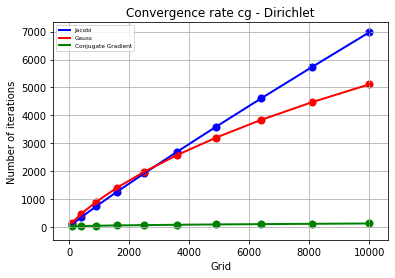

In [3]:
pyplot.scatter( Grid, D_Iter_jacobi, color='blue', marker='o', s = 50 )
pyplot.scatter( Grid, D_Iter_gauss, color='red', marker='o', s =50 )
pyplot.scatter( Grid, D_Iter_cg, color='green', marker='o', s = 50 )

pyplot.plot( Grid, D_Iter_jacobi, color='blue', linewidth = 2, label='Jacobi')
pyplot.plot( Grid, D_Iter_gauss, color='red', linewidth = 2, label='Gauss')
pyplot.plot( Grid, D_Iter_cg, color='green', linewidth = 2, label='Conjugate Gradient')
    
pyplot.legend(fontsize='xx-small')
pyplot.ylabel( 'Number of iterations' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Convergence rate cg - Dirichlet' );


pyplot.savefig('Convergence rate Iteration - Dirichlet.png', dpi=100, bbox_inches='tight')

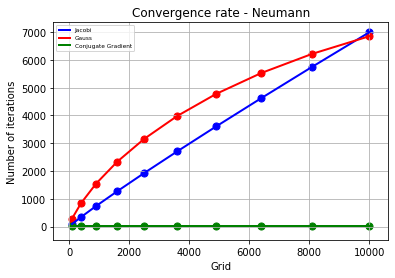

In [4]:
pyplot.scatter( Grid, N_Iter_jacobi, color='blue', marker='o', s = 50 )
pyplot.scatter( Grid, N_Iter_gauss, color='red', marker='o', s =50 )
pyplot.scatter( Grid, N_Iter_cg, color='green', marker='o', s = 50 )

pyplot.plot( Grid, N_Iter_jacobi, color='blue', linewidth = 2, label='Jacobi')
pyplot.plot( Grid, N_Iter_gauss, color='red', linewidth = 2, label='Gauss')
pyplot.plot( Grid, N_Iter_cg, color='green', linewidth = 2, label='Conjugate Gradient')
    
pyplot.legend(fontsize='xx-small')
pyplot.ylabel( 'Number of iterations' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Convergence rate - Neumann' );

pyplot.savefig('Convergence rate Iteration  - Neumann.png' , dpi=100, bbox_inches='tight')

In term of number of iteration:

The Jacobi and the Gauss Seidel have approximately the same convergence rate.
The conjugate gradient converge the fastest.


In [5]:
Grid = [ 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]
D_Time_jacobi = [0.0105931758880615, 0.0411930084228515, 0.0820608139038086, 0.14708399772644, 0.289746046066284, 0.481709718704223, 0.71285605430603, 1.13433289527893, 1.63750505447387, 2.1870629787445 ]
N_Time_jacobi = [ 0.00999808311462402, 0.0469560623168945, 0.0891370773315429, 0.154545307159423, 0.287178039550781, 0.516285181045532, 0.681870937347412, 1.00885200500488, 1.8143560886383, 1.93274068832397]

D_Time_gauss = [ 0.0737738609313964, 0.751014947891235, 3.02885484695434, 8.22992515563964, 16.6982457637786, 33.2367532253265, 54.3660130500793, 82.1511800289154, 136.349192857742, 171.71486210823]
N_Time_gauss = [ 0.128565073013305, 1.36274886131286, 5.40028500556945, 12.9512400627136, 27.3680889606475, 49.3563179969787, 79.3699572086334, 123.625168800354, 171.671663045883, 232.104516983032]

D_Time_cg = [ 0.00202393531799316, 0.00537276268005371, 0.0065779685974121, 0.0116710662841796, 0.014096975326538, 0.0182971954345703, 0.0275599956512451, 0.0354080200195312, 0.0440399646759033, 0.0539579391479492]
N_Time_cg = [ 0.000929832458496093, 0.000781059265136718, 0.00139999389648437, 0.00142312049865722, 0.00162410736083984, 0.00157427787780761, 0.00154304504394531, 0.00226187705993652, 0.00178980827331542, 0.00223803520202636]

D_Time_direct = [0.00500822067260742, 0.00436997413635253, 0.00491714477539062, 0.0057690143585205, 0.0100412368774414, 0.0120248794555664, 0.0273778438568115, 0.0257258415222167, 0.0349559783935546, 0.0520739555358886]
N_Time_direct = [0.00197911262512207, 0.00251388549804687, 0.00370502471923828, 0.00645995140075683, 0.00874519348144531, 0.0161161422729492, 0.0202381610870361, 0.0255937576293945, 0.0355477333068847, 0.051100730895996]

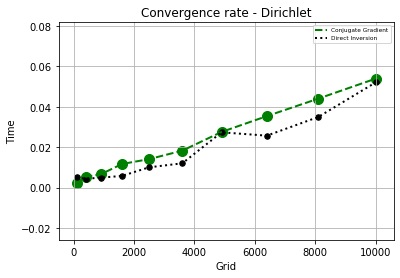

In [6]:
#pyplot.scatter( Grid, D_Time_jacobi, color='blue', marker='o', s = 200 )
#pyplot.scatter( Grid, D_Time_gauss, color='red', marker='o', s =50 )
pyplot.scatter( Grid, D_Time_cg, color='green', marker='o', s = 100 )
pyplot.scatter( Grid, D_Time_direct, color='black', marker='o', s = 30 )
  
#pyplot.plot( Grid, D_Time_jacobi, color='blue', linewidth = 2, label='Jacobi')
#pyplot.plot( Grid, D_Time_gauss, color='red', linewidth = 2,  label='Gauss')
pyplot.plot( Grid, D_Time_cg, color='green', linewidth = 2, linestyle='--', label='Conjugate Gradient')
pyplot.plot( Grid, D_Time_direct, color='black', linewidth = 2, linestyle=':', label='Direct Inversion')
    
pyplot.legend(fontsize='xx-small')

pyplot.ylabel( 'Time' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Convergence rate - Dirichlet' );

pyplot.savefig('Convergence rate Time CG-DI - Dirichlet.png', dpi=100, bbox_inches='tight')

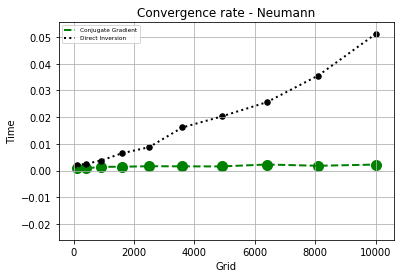

In [7]:
#pyplot.scatter( Grid, N_Time_jacobi, color='blue', marker='o', s = 200 )
#pyplot.scatter( Grid, N_Time_gauss, color='red', marker='o', s =50 )
pyplot.scatter( Grid, N_Time_cg, color='green', marker='o', s = 100 )
pyplot.scatter( Grid, N_Time_direct, color='black', marker='o', s = 30 )
  
#pyplot.plot( Grid, N_Time_jacobi, color='blue', linewidth = 2, label='Jacobi')
#pyplot.plot( Grid, N_Time_gauss, color='red', linewidth = 2,  label='Gauss')
pyplot.plot( Grid, N_Time_cg, color='green', linewidth = 2, linestyle='--', label='Conjugate Gradient')
pyplot.plot( Grid, N_Time_direct, color='black', linewidth = 2, linestyle=':', label='Direct Inversion')
    
pyplot.legend(fontsize='xx-small')

pyplot.ylabel( 'Time' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Convergence rate - Neumann' );

pyplot.savefig('Convergence rate Time cg-d- Neumann.png', dpi=100, bbox_inches='tight')

In term of time: 

The Gauss Seidel method converges the slowest in time.
All other solvers have the same convergence rate in time.

In [8]:
Grid = [ 100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]
D_Error_jacobi = [0.00120972913379368, 0.00017160804411781, 0.000053740460570442, 0.0000233538235999754, 0.0000121777115546, 7.13433361926515E-06, 4.53191573623201E-06, 3.05519932632324E-06, 2.15558227468445E-06, 1.57647759574475E-06]
N_Error_jacobi = [0.00158680284770076, 0.000204090994048942, 0.000060739273981859, 0.0000256592070987604, 0.0000131441400032469, 7.60746283805118E-06, 4.79000920791157E-06, 3.20766349920222E-06, 2.25134686587981E-06, 1.63960942259486E-06]

D_Error_gauss = [0.00120972942369153, 0.000171608897207953, 0.0000537418514130533, 0.0000233557135284493, 0.0000121801247133399, 0.0000071372587446633, 4.53535179658421E-06, 3.05914653162862E-06, 2.16005768803219E-06, 1.58148048524466E-06]
N_Error_gauss = [0.00158680319920704, 0.000204091892815257, 0.000060740668852878, 0.0000256611256393216, 0.0000131465599865657, 7.61039840832449E-06, 7.61039840832449E-06, 3.21165063985507E-06, 2.25586535717977E-06, 1.64467629211046E-06]

D_Error_cg = [0.011929726777006, 0.00328913841668277, 0.00151388657783194, 0.000865283501674661, 0.000558606135313131, 0.000389971312706805, 0.000287504784517653, 0.000220653712941197, 0.000174651254664481, 0.00014165593230758]
N_Error_cg = [0.00158680316195946, 0.000204091870442438, 0.0000607406531627295, 0.0000256611126549014, 0.0000131465467515539, 7.61038105455325E-06, 0.0000047934351819887, 3.21160543929508E-06, 0.000002255791770942, 1.64456385662275E-06]

D_Error_direct = [0.0012097294299322, 0.000171608900749832, 0.0000537418538172147, 0.0000233557150722461, 0.0000121801250800113, 0.0000071372568981771, 4.53534557532147E-06, 3.05913209945122E-06, 2.16002949812672E-06, 0.0000015814338191932]
N_Error_direct = [0.32797929020052, 0.00682796710848494, 0.0162042658333197, 0.00300980546032906, 0.000111793296272326, 0.00139386693527041, 0.00160667647182345, 0.000498709409632609, 0.00161894652298738, 0.000153306399282009]

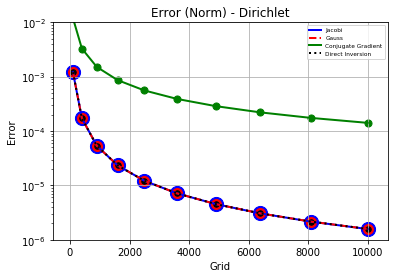

In [9]:
pyplot.scatter( Grid, D_Error_jacobi, color='blue', marker='o', s = 200 )
pyplot.scatter( Grid, D_Error_gauss, color='red', marker='o', s =100 )
pyplot.scatter( Grid, D_Error_cg, color='green', marker='o', s = 50 )
pyplot.scatter( Grid, D_Error_direct, color='black', marker='o', s = 30 )

pyplot.plot( Grid, D_Error_jacobi, color='blue', linewidth = 2, label='Jacobi')
pyplot.plot( Grid, D_Error_gauss, color='red', linewidth = 2, linestyle='--', label='Gauss')
pyplot.plot( Grid, D_Error_cg, color='green', linewidth = 2, label='Conjugate Gradient')
pyplot.plot( Grid, D_Error_direct, color='black', linewidth = 2, linestyle=':', label='Direct Inversion')
    
pyplot.yscale('log')   

pyplot.ylim([10**(-6), 10**(-2) ])
pyplot.legend(fontsize='xx-small')
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Error (Norm) - Dirichlet' );

pyplot.savefig('Error (Norm) - Dirichlet.png', dpi=100, bbox_inches='tight')


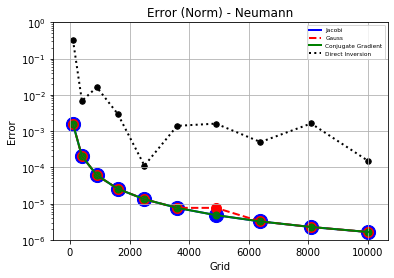

In [10]:
pyplot.scatter( Grid, N_Error_jacobi, color='blue', marker='o', s = 200 )
pyplot.scatter( Grid, N_Error_gauss, color='red', marker='o', s =100 )
pyplot.scatter( Grid, N_Error_cg, color='green', marker='o', s = 50 )
pyplot.scatter( Grid, N_Error_direct, color='black', marker='o', s = 30 )

pyplot.plot( Grid, N_Error_jacobi, color='blue', linewidth = 2, label='Jacobi')
pyplot.plot( Grid, N_Error_gauss, color='red', linewidth = 2, linestyle='--', label='Gauss')
pyplot.plot( Grid, N_Error_cg, color='green', linewidth = 2, label='Conjugate Gradient')
pyplot.plot( Grid, N_Error_direct, color='black', linewidth = 2, linestyle=':', label='Direct Inversion')
    
pyplot.yscale('log')   

pyplot.ylim([10**(-6), 1 ])
pyplot.legend(fontsize='xx-small')
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.xlabel( 'Grid' )
pyplot.title( 'Error (Norm) - Neumann' );

pyplot.savefig('Error (Norm) - Neumann.png', dpi=100, bbox_inches='tight')


# Figures of Analytical and numerical solutions

All figures can be visualized by choosing user_bc to dirichlet or neumann and by choosing poisson_solver to :
 'serial_jacobi'
 'serial_gauss'
 'serial_cg'
 'serial_direct'


In [2]:
# Define grid parameters
nx, ny = 100, 100
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Define cell-centered variable names
center_vars = ['asol', 'ivar', 'rvar', 'eror']
poisson_vars = ['ivar', 'rvar']

simulation_info = dict(verbose = True, poisson_solver = 'direct')

# Define boundary condition for the poisson test
user_bc = 'neumann'

# Define boundary conditions for variable ivar
bc_type = dict(ivar = [user_bc, user_bc, user_bc, user_bc])
bc_val  = dict(ivar = [0.0, 0.0, 0.0, 0.0])

domain_data_struct = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, bc_type_center=bc_type, bc_val_center=bc_val)

grid = domain_data_struct[0]

poisson = flowx.poisson_main(grid, poisson_vars, simulation_info)
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

NameError: name 'flowx' is not defined

In [12]:
# Compute the analytical solution 
simulation.get_analytical(grid, 'asol', user_bc)

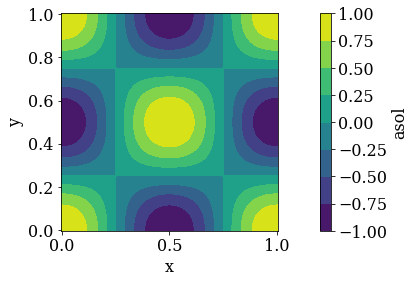

In [13]:
# Plot the analytical solution
flowx.io.plot_contour(grid, 'asol')




In [14]:
# Calculate the right-hand side of the Poisson system
simulation.get_rhs(grid, 'rvar', user_bc)

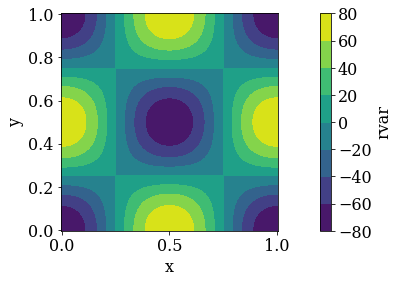

In [15]:
# Plot the right-hand side of the Poisson system
flowx.io.plot_contour(grid, 'rvar')

In [16]:
# Solve the Poisson system
t1 = time.time()
ites, res = poisson.solve_poisson()
t2 = time.time()
print (t2-t1)

Direct Solver:
- Final residual: 3.3906228514214676e-10
0.05379819869995117


In [17]:
help(time.time)

Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.



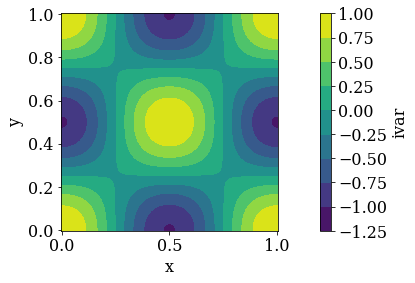

In [18]:
# Plot the numerical solution
flowx.io.plot_contour(grid, 'ivar')

In [19]:
# Compute the error (absolute value of the difference)
grid.get_error('eror', 'ivar', 'asol')

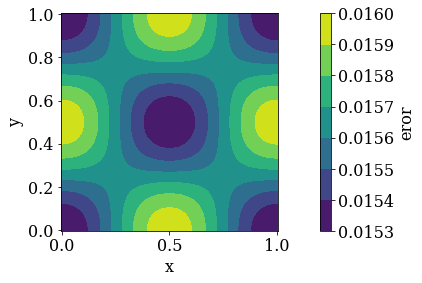

In [20]:
# Plot the error
flowx.io.plot_contour(grid, 'eror')

In [21]:
# Compute the L2-norm of the error.
l2_norm = grid.get_l2_norm('eror')

In [22]:
l2_norm

0.0001533063992820099